In [17]:
from fastai.vision.widgets import *

In [18]:
import fastai

In [19]:
from fastai import *

In [20]:
import fastbook
from fastbook import *

In [21]:
key = os.environ.get('AZURE_SEARCH_KEY', '079c978071fc4b018cbc369ff9b8fe02')

In [22]:
fis_ad = 'isla fisher', 'amy adams'
path = Path('fisheradams')

In [23]:
if not path.exists():
    path.mkdir()
    for o in fis_ad:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} fis_ad')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [24]:
fns = get_image_files(path)

In [25]:
failed = verify_images(fns)

In [26]:
failed

(#0) []

In [27]:
failed.map(Path.unlink);

In [28]:
fisherORadams = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [29]:
dls = fisherORadams.dataloaders(path)

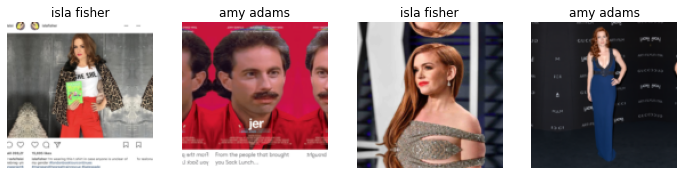

In [30]:
fisherORadams = fisherORadams.new(item_tfms=Resize(128, ResizeMethod.Pad))
dls = fisherORadams.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

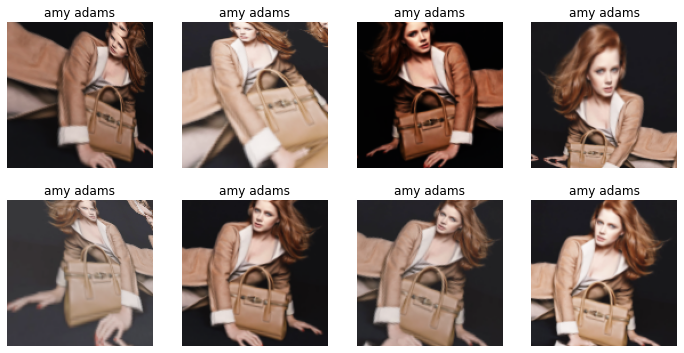

In [31]:
fisherORadams = fisherORadams.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = fisherORadams.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [32]:
fisherORadams = fisherORadams.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fisherORadams.dataloaders(path)

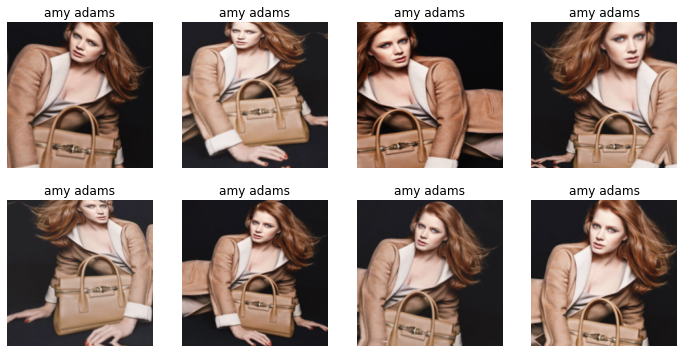

In [33]:
dls.show_batch(max_n=8, nrows=2, unique=True)

In [34]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(15)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.276119,0.987294,0.452830,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.034007,0.748825,0.396226,00:05
1,0.888731,0.688889,0.339623,00:05
2,0.795420,0.737680,0.264151,00:05
3,0.734751,0.820496,0.283019,00:05
4,0.659260,0.891119,0.320755,00:05
5,0.587218,0.831884,0.283019,00:05
6,0.517884,0.672152,0.188679,00:05
7,0.464952,0.648130,0.150943,00:04
8,0.416959,0.694314,0.188679,00:05
9,0.372338,0.738036,0.188679,00:05


In [35]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [38]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [39]:
img = PILImage.create(btn_upload.data[-1])
                                    

IndexError: list index out of range

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()


In [ ]:
VBox([widgets.Label('Select your favorite oft-confused redheaded movie star!'),
                    btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload